In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.DataFrame({
    "Valor Compra":[100, 200, 150, 300, 50, 400, 250, 450, 600, 70],
    "Forma de Pagamento":['PIX', 'Cartão', 'PIX', 'Cartão', 'PIX', 'Cartão', 'Cartão', 'PIX', 'PIX', 'Cartão'],
     })

In [6]:
data['Forma de Pagamento'] = data['Forma de Pagamento'].map({'PIX': 1, 'Cartão': 0})

In [7]:
data.head()

,Valor Compra,Forma de Pagamento
0,100,1
1,200,0
2,150,1
3,300,0
4,50,1


In [8]:
X = data[['Valor Compra']]

y = data['Forma de Pagamento']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [10]:
model = SVC(kernel= 'linear') 
model.fit(X_train,y_train) 

SVC(kernel='linear')

In [11]:
y_pred = model.predict(X_test)

In [12]:
X_test

,Valor Compra
8,600
1,200
5,400


In [13]:
acc = accuracy_score(y_pred,y_test)
acc

0.3333333333333333

In [14]:
cr=classification_report(y_pred,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [15]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[0 0]
 [2 1]]


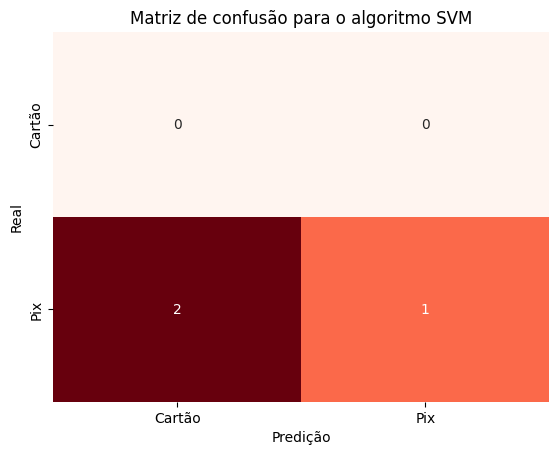

In [17]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Cartão', 'Pix'], 
            yticklabels=['Cartão', 'Pix'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')    
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

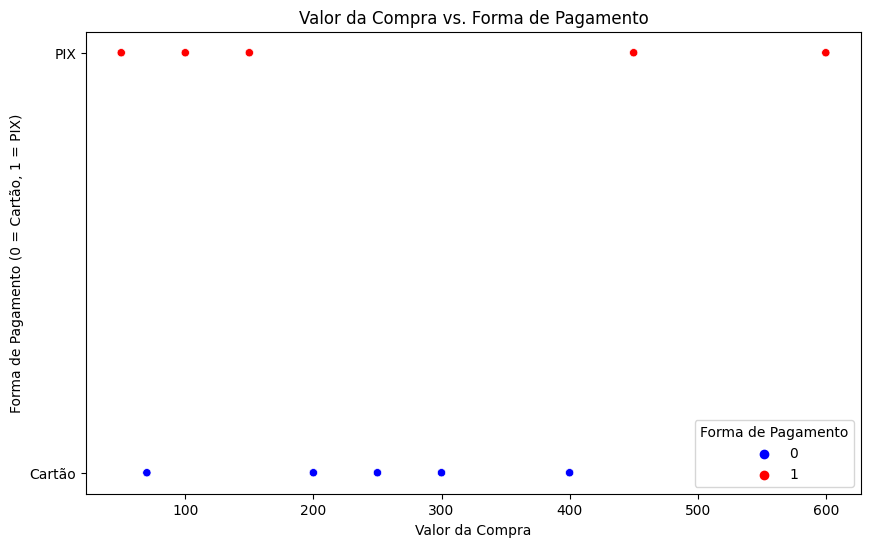

In [18]:
palette =  {0: "blue", 1: "red"}
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor Compra', y='Forma de Pagamento', data=data, hue='Forma de Pagamento', palette=palette)
plt.title('Valor da Compra vs. Forma de Pagamento')
plt.xlabel('Valor da Compra')
plt.ylabel('Forma de Pagamento (0 = Cartão, 1 = PIX)')
plt.yticks([0, 1], ['Cartão', 'PIX'])
plt.show()